# P - PLAN




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
Base_dados_completa = pd.read_excel('BASE_DADOS_CONTROLE.xlsx')
Base_dados_completa = Base_dados_completa.drop('Defeitos',axis=1)
Base_dados_completa.head()
#print(Base_dados_completa.columns)


,ID,Mês,Ano,Produto,ID Cliente,Estado,Classificação da reclamação,Custo
0,1,Janeiro,2023,Biscoito,95355711,PR,Sensorial indesejada,200
1,2,Janeiro,2023,Biscoito,95274719,SP,Sensorial indesejada,60
2,3,Janeiro,2023,Biscoito,95187673,MG,Embalagem com defeito,100
3,4,Janeiro,2023,Biscoito,94959377,MG,Embalagem com defeito,106
4,5,Janeiro,2023,Biscoito,94850421,SP,Peso alterado,73


In [22]:
database = Base_dados_completa
database = database.groupby(['Mês','Classificação da reclamação'],as_index=False).sum()
database = database[['Mês','Classificação da reclamação','Count']]
display(database)

,Mês,Classificação da reclamação,Count
0,Abril,Embalagem com defeito,4
1,Abril,Peso alterado,2
2,Abril,Sensorial indesejada,2
3,Fevereiro,Embalagem com defeito,10
4,Fevereiro,Matéria estranha,1
5,Fevereiro,Peso alterado,1
6,Fevereiro,Sensorial indesejada,2
7,Janeiro,Embalagem com defeito,5
8,Janeiro,Matéria estranha,1
9,Janeiro,Peso alterado,1


### 2. Histórico do Problema
Qual a freqüência do problema? Como ocorre?  Evite o achismo, baseie-se em fatos e dados.
Ferramentas empregadas: Gráfico sequencial de linha. Ex: Número de defeitos por mês. Utilize somente dados históricos.



In [4]:
ordem = ['Janeiro', 'Fevereiro', 'Março','Abril','Maio','Junho','Julho']


In [24]:
base_defeitos = Base_dados_completa[['Mês','Produto']]
base_defeitos = base_defeitos.groupby(['Mês'],as_index=False).count()

# trocar o nome do mês pelo número
for i,mes in enumerate(ordem):
    base_defeitos.loc[base_defeitos['Mês'] == mes,'Mês'] = i+1

# colocar em ordem
base_defeitos = base_defeitos.sort_values('Mês',ignore_index=True)

# voltar para ano 
for i,mes in enumerate(ordem):
    base_defeitos.loc[base_defeitos['Mês'] == i+1,'Mês'] = mes

total_reclamacoes = base_defeitos['Produto'].sum()
#print(total_reclamacoes)
display(base_defeitos)

100


,Mês,Produto
0,Janeiro,11
1,Fevereiro,14
2,Março,9
3,Abril,8
4,Maio,17
5,Junho,20
6,Julho,21


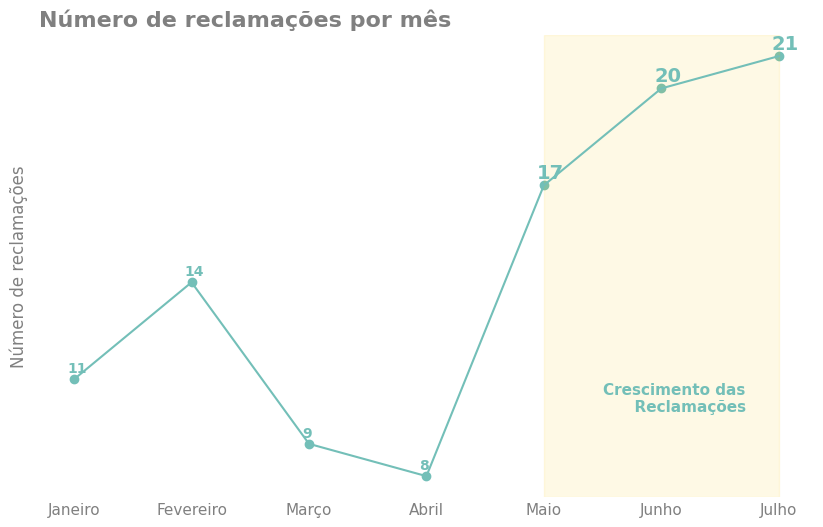

In [6]:
plt.figure(figsize=(10,6))

plt.plot(base_defeitos['Mês'],base_defeitos['Produto'],color='#73BFB8')
plt.scatter(base_defeitos['Mês'],base_defeitos['Produto'],color='#73BFB8')

plt.axvspan(4,6,color='#FEC601',alpha=0.1)
plt.text(4.5, 10, 'Crescimento das\n      Reclamações', fontsize=11, color='#73BFB8', weight='bold')


for i in range(len(ordem)):
    if i > 3:
        tam = 14
    else:
        tam = 10
        
    plt.annotate(base_defeitos['Produto'][i],color='#73BFB8',xy=(base_defeitos['Mês'][i],base_defeitos['Produto'][i]),xytext=(-5, 5), textcoords='offset points',weight='bold',size=tam)

plt.yticks([])
plt.ylabel('Número de reclamações', color='grey', size=12)
plt.xticks(color='grey',size=11)
plt.tick_params(axis='x',length=0)
plt.title('Número de reclamações por mês',size=16,weight='bold',loc='left',color='grey')

plt.grid(False)
plt.box(False)

plt.savefig('Número de reclamações por mês.png', bbox_inches='tight',dpi=300)


### 2.1 Histograma

C:\Users\costa\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\costa\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\costa\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\costa\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

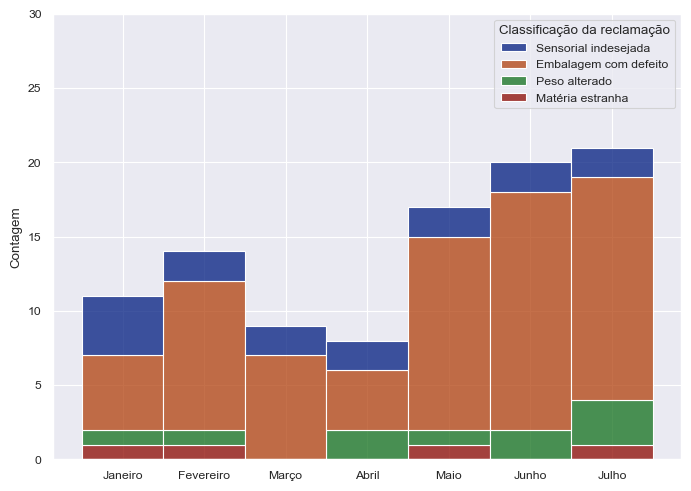

In [34]:
plt.subplots(figsize=(7,5),tight_layout=True)

sns.set_theme(context='paper',palette='dark')
chart1 = sns.histplot(data=Base_dados_completa,x='Mês',hue='Classificação da reclamação',multiple='stack');
chart1.set_ylabel('Contagem')
chart1.set_xlabel('')
chart1.set_ylim(bottom=0,top=30)

plt.savefig('Histograma.png', bbox_inches='tight',dpi=300)

### 3. Mostrar Perdas Atuais e Ganhos Possíveis
O que se está perdendo? (Custo da qualidade) O que é possível ganhar?
Ferramentas empregadas: Utilizar Gráfico sequencial de linha para melhor visualização. 


In [7]:
base_perdas = Base_dados_completa[['Mês','Custo ']]
base_perdas = base_perdas.groupby(['Mês'],as_index=False).sum()

# trocar o nome do mês pelo número
for i,mes in enumerate(ordem):
    base_perdas.loc[base_perdas['Mês'] == mes,'Mês'] = i+1

# colocar em ordem
base_perdas = base_perdas.sort_values('Mês',ignore_index=True)

# voltar para ano 
for i,mes in enumerate(ordem):
    base_perdas.loc[base_perdas['Mês'] == i+1,'Mês'] = mes


display(base_perdas)

,Mês,Custo
0,Janeiro,2695
1,Fevereiro,10444
2,Março,13881
3,Abril,3769
4,Maio,5050
5,Junho,4300
6,Julho,3370


In [8]:
lista_valor = list(base_perdas['Custo '])
lista_valor.append(base_perdas['Custo '].sum())
lista_reais = []

for i,custo in enumerate(lista_valor):
    valor = f'R$ {custo:,.0f}'
    valor = valor.replace(',','.')
    lista_reais.append(valor)
    
print(lista_reais)

['R$ 2.695', 'R$ 10.444', 'R$ 13.881', 'R$ 3.769', 'R$ 5.050', 'R$ 4.300', 'R$ 3.370', 'R$ 43.509']


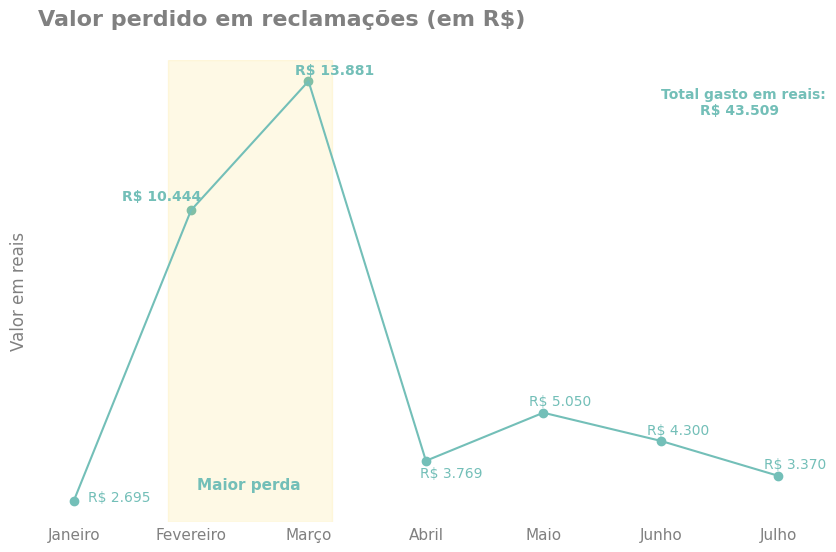

In [18]:
plt.figure(figsize=(10,6))

plt.plot(base_perdas['Mês'],base_perdas['Custo '],color='#73BFB8')
plt.scatter(base_perdas['Mês'],base_perdas['Custo '],color='#73BFB8')

plt.axvspan(0.8,2.2,color='#FEC601',alpha=0.1)
plt.text(1.05, 3000, 'Maior perda', fontsize=11, color='#73BFB8', weight='bold')

plt.text(5,13000,f'Total gasto em reais:\n        {lista_reais[7]}',size=10,weight='bold',color='#73BFB8')


for i in range(len(ordem)):
    if base_perdas['Custo '][i] > 10000:
        bold = 'bold'
    else:
        bold = None
        
    if i == 0:
        coord = (10,0)
    elif i == 1:
        coord = (-50,7)
    elif i == 3:
        coord = (-4,-12)
    else:
        coord = (-10,5)
        
    plt.annotate(lista_reais[i],color='#73BFB8',xy=(base_perdas['Mês'][i],base_perdas['Custo '][i]),xytext=coord, textcoords='offset points',weight=bold,size=10)

plt.yticks([])
plt.ylabel('Valor em reais', color='grey', size=12)
plt.xticks(color='grey',size=11)
plt.tick_params(axis='x',length=0)
plt.title('Valor perdido em reclamações (em R$)',size=16,weight='bold',loc='left',color='grey',pad=25)

plt.grid(False)
plt.box(False)

plt.savefig('Valor perdido em reclamações (em R$).png', bbox_inches='tight',dpi=300)

### 4. Análise de Pareto
A análise de Pareto possibilita priorizar temas e estabelecer metas numéricas viáveis. 
Não se procuram causas aqui, só os resultados indesejáveis. As causas serão procuradas na Análise de fenômeno.
Ferramentas empregadas: Gráficos de Pareto.


In [10]:
base_pareto = Base_dados_completa[['Produto', 'Classificação da reclamação']]
base_pareto = base_pareto.groupby(['Classificação da reclamação'],as_index=False).count()
base_pareto = base_pareto.sort_values(['Produto'],ascending=False,ignore_index=True)


base_pareto.loc[0,'porcentagem_acumulada'] = int(70)
base_pareto.loc[1,'porcentagem_acumulada'] = int(86)
base_pareto.loc[2,'porcentagem_acumulada'] = int(96)
base_pareto.loc[3,'porcentagem_acumulada'] = int(100)


base_pareto.head()

,Classificação da reclamação,Produto,porcentagem_acumulada
0,Embalagem com defeito,70,70.0
1,Sensorial indesejada,16,86.0
2,Peso alterado,10,96.0
3,Matéria estranha,4,100.0


In [11]:
lista_produto = [f'{valor:.2f}%' for valor in base_pareto['Produto']]
lista_acumulada = [f'{valor:.2f}%' for valor in base_pareto['porcentagem_acumulada']]

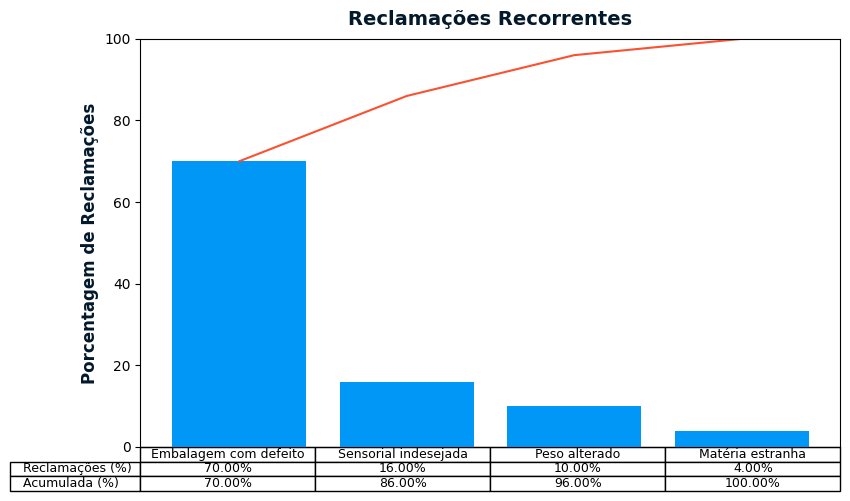

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure(figsize=(10,6))
plt.bar(base_pareto['Classificação da reclamação'],base_pareto['Produto'],color='#0197F6')
plt.plot(base_pareto['Classificação da reclamação'],base_pareto['porcentagem_acumulada'],color='#FC5130')

the_table = plt.table(cellText=( lista_produto,lista_acumulada), #valores 
                  rowLabels=['Reclamações (%)', 'Acumulada (%)'], #nome das linhas da tabela
                  loc='bottom', # localização da tabela
                  colLabels=base_pareto['Classificação da reclamação'], # nome das colunas
                  cellLoc='center')

the_table.auto_set_font_size(False)
the_table.set_fontsize(9)

plt.subplots_adjust(left=0.2, bottom=0.2) 

plt.title('Reclamações Recorrentes', weight='bold', pad=10, size=14,color='#02182B')
plt.ylabel('Porcentagem de Reclamações', weight='bold',size= 12,color='#02182B')
plt.xticks([])
plt.ylim(top=100)
plt.show()
plt.savefig('gráfico_pareto1.png', bbox_inches='tight',dpi=300)

In [13]:
formatacao = [f'{valor:.0f}%' for valor in base_pareto['porcentagem_acumulada']]
print(formatacao)

['70%', '86%', '96%', '100%']


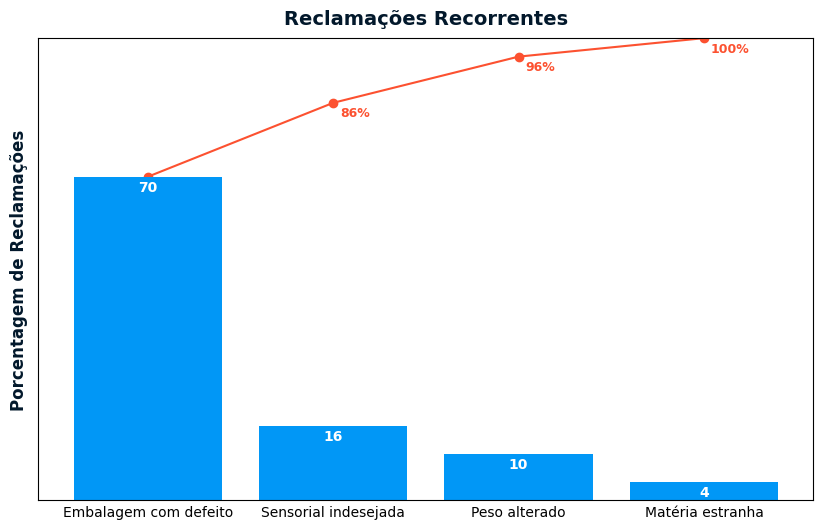

In [14]:
plt.figure(figsize=(10,6))
barra = plt.bar(base_pareto['Classificação da reclamação'],base_pareto['Produto'],color='#0197F6')
plt.bar_label(barra, labels= base_pareto['Produto'],padding=-12.5,weight='bold',color='white')

plt.plot(base_pareto['Classificação da reclamação'],base_pareto['porcentagem_acumulada'],color='#FC5130',marker='o',zorder=0)
for i in range(len(base_pareto['porcentagem_acumulada'])):
    if i > 0:
        plt.annotate(formatacao[i],color='#FC5130',xy=(base_pareto['Classificação da reclamação'][i],base_pareto['porcentagem_acumulada'][i]),xytext=(5, -10), textcoords='offset points',weight='bold',size=9)


plt.title('Reclamações Recorrentes', weight='bold', pad=10, size=14,color='#02182B')
plt.ylabel('Porcentagem de Reclamações', weight='bold',size= 12,color='#02182B')
plt.yticks([])
plt.tick_params(axis='x',length=0)
plt.ylim(top=100)
plt.savefig('gráfico_pareto2.png', bbox_inches='tight',dpi=300)
plt.show()